First, Compile a list of all chandra sources that could possibly be in PASSAGE (within 3 arcmin of the center)

In [47]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
from astroquery.heasarc import Heasarc
from astropy.utils.data import download_file
import astropy.units as u
import pandas as pd
from astroquery.vizier import Vizier
import astropy.table as tab
from matplotlib.patches import Circle
from ipywidgets import interact
import os


In [48]:
check_radius=0.05*u.deg #=3 arcmin
catalog_names = {'chandra':'csc',
                 'xmm':'xmmstack'}
                 
par_coords_import=np.loadtxt('./par_coords.csv',dtype='str',delimiter=',')
par_coords_list=coord.SkyCoord(ra=par_coords_import[:,1],dec=par_coords_import[:,2],unit=(u.deg, u.deg))
par_names=par_coords_import[:,0]

In [22]:
temp=pd.read_csv('./csc_table.csv', delimiter=',')
print(temp)
temp = temp.drop_duplicates(subset=['name'])
print(len(temp))
temp.to_csv('./csc_table_nodup.tsv', index=False, sep='\t')



                      name          ra        dec  significance  \
0    2CXO J111959.4+063641  169.997826   6.611406          4.72   
1    2CXO J112001.2+063610  170.005175   6.602871          2.56   
2    2CXO J112008.8+063438  170.036895   6.577439          2.21   
3    2CXO J112009.1+063814  170.038094   6.637490          4.32   
4    2CXO J114824.6+524847  177.102851  52.813074          2.70   
..                     ...         ...        ...           ...   
401  2CXO J103027.1+052917  157.613073   5.488196          4.05   
402  2CXO J103028.4+053114  157.618569   5.520807         11.50   
403  2CXO J095946.7-224853  149.944730 -22.814813          4.83   
404  2CXO J095951.8-224728  149.965982 -22.791243          6.02   
405  2CXO J100001.0-224713  150.004490 -22.787133          3.29   

     error_ellipse_r0  error_ellipse_r1  error_ellipse_angle par_name  
0             1.15967           0.63500              136.167   Par001  
1             2.95072           1.25791            

In [ ]:
#Stacked Observation Detections Table Chandra

stack_obs = pd.read_csv('./cscresults_nodup.tsv', sep='\t', comment='#')

#print(stack_obs.columns)

unique_obj = stack_obs['master_source.name'].unique()

chosen_stacks = pd.DataFrame(columns=stack_obs.columns)

for obj in unique_obj:
    #print('Processing object:', obj)
    
    obj_stacks= stack_obs[stack_obs['master_source.name'] == obj]

    max_row = obj_stacks[obj_stacks['stack_source.likelihood_b'] == obj_stacks['stack_source.likelihood_b'].max()]

    chosen_stacks = pd.concat([chosen_stacks, max_row], ignore_index=True)



print(len(chosen_stacks))
print(len(stack_obs))

print(len(unique_obj))
print(len(chosen_stacks['master_source.name'].unique()))

#find the folder
filepath='./cdapackage.142.20250627.223552.001'
filenames= os.listdir(filepath)
print(filenames)

good_filenames = np.empty(dtype=str, shape=0)

for filename in filenames:
    if filename.endswith('.fits.gz'):
        for i in range(len(chosen_stacks)):
            row = chosen_stacks.iloc[i]
            if row['stack_source.detect_stack_id'] in filename:
                if str(row['stack_source.region_id']).zfill(4)+'b' in filename:
                    #print('Found matching file:', filename)
                # Do something with the matching file
                    good_filenames = np.append(good_filenames, filename)

#print(good_filenames)
#print(len(good_filenames))



/tmp/ipykernel_73082/851890383.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chosen_stacks = pd.concat([chosen_stacks, max_row], ignore_index=True)


387
1437
387
387
['acisfJ0959481p020015_001N031_r0069b_regimg3.fits.gz', 'acisfJ1000327p023059_001N031_r0310b_regimg3.fits.gz', 'acisfJ1002499p020946_001N031_r0007b_regimg3.fits.gz', 'acisfJ1149288p222105_001N026_r0064b_regimg3.fits.gz', 'acisfJ0959481p020015_001N030_r0258b_regimg3.jpg.gz', 'acisfJ1030266p052411_001N020_r0323b_regimg3.jpg.gz', 'acisfJ1000373p014716_001N021_r0023b_regimg3.jpg.gz', 'acisfJ1002106p022956_001N029_r0116b_regimg3.fits.gz', 'acisfJ0959481p020015_001N030_r0252b_regimg3.fits.gz', 'acisfJ1000482p015447_001N031_r0270b_regimg3.fits.gz', 'acisfJ1030266p052411_001N020_r0080b_regimg3.jpg.gz', 'acisfJ0958479p020543_001N021_r0107b_regimg3.jpg.gz', 'acisfJ1245445p032358_001N026_r0159b_regimg3.fits.gz', 'acisfJ1000072p015000_001N031_r0177b_regimg3.jpg.gz', 'acisfJ1001292p015934_001N030_r0025b_regimg3.jpg.gz', 'acisfJ0959481p020015_001N030_r0256b_regimg3.jpg.gz', 'acisfJ1001511p021436_001N031_r0233b_regimg3.jpg.gz', 'acisfJ1226428p215013_001N028_r0002b_regimg3.fits.gz', '

In [59]:
destination_folder = './chan_fits'

for i in range(len(good_filenames)):
    source_path = os.path.join(filepath, good_filenames[i])
    destination_path = os.path.join(destination_folder, good_filenames[i])
    print('Copying', source_path, 'to', destination_path)
    os.system(f'cp {source_path} {destination_path}')  # Use cp command to copy files
    print(i)


print(len(os.listdir(destination_folder)))
print(len(os.listdir(filepath)))

print(len(np.unique(good_filenames)))


Copying ./cdapackage.142.20250627.223552.001/acisfJ1002499p020946_001N031_r0007b_regimg3.fits.gz to ./chan_fits/acisfJ1002499p020946_001N031_r0007b_regimg3.fits.gz
0
Copying ./cdapackage.142.20250627.223552.001/acisfJ1149288p222105_001N026_r0064b_regimg3.fits.gz to ./chan_fits/acisfJ1149288p222105_001N026_r0064b_regimg3.fits.gz
1
Copying ./cdapackage.142.20250627.223552.001/acisfJ1245445p032358_001N026_r0159b_regimg3.fits.gz to ./chan_fits/acisfJ1245445p032358_001N026_r0159b_regimg3.fits.gz
2
Copying ./cdapackage.142.20250627.223552.001/acisfJ1226428p215013_001N028_r0002b_regimg3.fits.gz to ./chan_fits/acisfJ1226428p215013_001N028_r0002b_regimg3.fits.gz
3
Copying ./cdapackage.142.20250627.223552.001/acisfJ1001211p021720_001N029_r0073b_regimg3.fits.gz to ./chan_fits/acisfJ1001211p021720_001N029_r0073b_regimg3.fits.gz
4
Copying ./cdapackage.142.20250627.223552.001/acisfJ0958370p015812_001N031_r0091b_regimg3.fits.gz to ./chan_fits/acisfJ0958370p015812_001N031_r0091b_regimg3.fits.gz
5
Copy

In [5]:
df_counts=pd.DataFrame(columns=catalog_names.keys(),index=par_names)

#identifying number of objects in each field for chandra and xmm

for j in range(len((catalog_names.values()))):
    print(list(catalog_names.values())[j]+'\n')

    column_counts=np.zeros(len(par_coords_list))

    for i in range(len(par_coords_list)):

            current_par=par_names[i]

            print(current_par+'\n')

            #query chandra
            result = Heasarc.query_region(par_coords_list[i],catalog=list(catalog_names.values())[j],radius=check_radius)

            if len(result) > 0:
                column_counts[i]=len(result)
            else:
                print("Nothing found for "+ current_par)
                continue

    df_counts[list(catalog_names.keys())[j]]=column_counts

csc

Par001



DALFormatError: ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [4]:
print(df_counts)
print(sum(df_counts['chandra']),sum(df_counts['xmm']))

        chandra   xmm
Par001      4.0  31.0
Par002     13.0  16.0
Par003     19.0  36.0
Par004      2.0   0.0
Par005     18.0  16.0
...         ...   ...
Par059      4.0  34.0
Par060     17.0  14.0
Par061      0.0   7.0
Par062      0.0   0.0
Par063      3.0   5.0

[63 rows x 2 columns]
406.0 876.0


In [ ]:
lrd_counts=np.zeros(len(par_coords_list))

for i in range(len(par_coords_list)):

    current_par=par_names[i]

    print(current_par+'\n')

    #query chandra
    result = Vizier.query_region(par_coords_list[i],catalog='J/A+A/693/L2',radius=check_radius)

    if len(result) > 0:
        print(len(result[0]))
        lrd_counts[i]=len(result[0])
    else:
        print("Nothing found for "+ current_par)
        continue

df_counts['lrd']=lrd_counts

Now that we know how many observations are in each field for both csc2.1 and xmmssc dr14, our next step is to actually extract their parameters, while appending an extra column that says the par they were discovered in. Chandra first - LOOK AT VIZIER FOR WHICH COLUMNS YOU NEED TO KEEP, sig, error ellipse, etc, maybe major fluxes

In [6]:
chan_cols='name,ra,dec,significance,error_ellipse_r0,error_ellipse_r1,error_ellipse_angle'

for i in range(len(par_coords_list)):
    
    #we already did the first one
    if i==0:
        csc_table=Heasarc.query_region(par_coords_list[i],catalog='csc',radius=check_radius,columns=chan_cols)
        add_col=tab.Column(np.repeat(par_names[i],len(csc_table)),name='par_name')
        csc_table.add_column(add_col)
        continue
    current_par=par_names[i]
    add_table=Heasarc.query_region(par_coords_list[i],catalog='csc',radius=check_radius,columns=chan_cols)
    add_col=tab.Column(np.repeat(par_names[i],len(add_table)),name='par_name')
    add_table.add_column(add_col)
    csc_table=tab.vstack([csc_table,add_table])

print(csc_table)

         name             ra        dec     ... error_ellipse_angle par_name
                         deg        deg     ...         deg                 
--------------------- ---------- ---------- ... ------------------- --------
2CXO J111959.4+063641 169.997826   6.611406 ...             136.167   Par001
2CXO J112001.2+063610 170.005175   6.602871 ...             138.979   Par001
2CXO J112008.8+063438 170.036895   6.577439 ...               0.000   Par001
2CXO J112009.1+063814 170.038094   6.637490 ...             119.970   Par001
2CXO J114824.6+524847 177.102851  52.813074 ...             177.741   Par002
2CXO J114824.3+524815 177.101473  52.804438 ...             175.473   Par002
2CXO J114825.1+524724 177.104584  52.790179 ...             170.290   Par002
2CXO J114831.2+524807 177.130191  52.802157 ...             172.773   Par002
2CXO J114833.2+524845 177.138346  52.812741 ...             166.376   Par002
                  ...        ...        ... ...                 ...      ...

In [7]:
#do the first one outside the loop

xmm_cols='detid, srcid, name, src_num, obsid, ra, dec, error_radius, ep_extent, ep_extent_error, ep_extent_ml, sc_ra, sc_dec, sc_poserr, sc_det_ml'

for i in range(len(par_coords_list)):
    
    #we already did the first one
    if i==0:
        xmm_table=Heasarc.query_region(par_coords_list[i],catalog='xmmssc',radius=check_radius,columns=xmm_cols)
        add_col=tab.Column(np.repeat(par_names[i],len(xmm_table)),name='par_name')
        xmm_table.add_column(add_col)
        continue
    current_par=par_names[i]
    add_table=Heasarc.query_region(par_coords_list[i],catalog='xmmssc',radius=check_radius,columns=xmm_cols)
    add_col=tab.Column(np.repeat(par_names[i],len(add_table)),name='par_name')
    add_table.add_column(add_col)
    xmm_table=tab.vstack([xmm_table,add_table])

print(xmm_table)


    


     detid           srcid               name         ... sc_det_ml par_name
                                                      ...                   
--------------- --------------- --------------------- ... --------- --------
106939903015035 206939901010018 4XMM J112008.5+063405 ...    356.99   Par001
108849904010129 206939902015162 4XMM J112011.6+063417 ...    20.004   Par001
106939902010003 206939901010002 4XMM J112014.8+063341 ...    5756.5   Par001
106939901010002 206939901010002 4XMM J112014.8+063341 ...    5756.5   Par001
106939902010158 206939902010158 4XMM J112005.6+063733 ...    7.8045   Par001
106939902010101 206939902010101 4XMM J112015.2+063654 ...    20.465   Par001
106939903010045 206939901010044 4XMM J112006.7+063351 ...    142.67   Par001
106939901010088 206939901010088 4XMM J112009.8+063337 ...    9.3716   Par001
106939902010013 206939901010010 4XMM J111959.5+063641 ...    1038.9   Par001
            ...             ...                   ... ...       ...      ...

In [14]:
len(set(xmm_table['srcid'])),len(set(xmm_table['obsid']))

#np.savetxt('xmm_table.csv',xmm_table,delimiter=',',header=xmm_table.colnames, fmt='%s')
#np.savetxt('csc_table.csv',csc_table,delimiter=',',header=csc_table.colnames, fmt='%s')

#xmm_table.write('xmm_table.csv',format='csv')
#csc_table.write('csc_table.csv',format='csv')
csc_table['ra','dec'].write('csc_table.tsv',format='tsv')

IORegistryError: No writer defined for format 'tsv' and class 'Table'.

The available formats are:

           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes            No           
 ascii.fixed_width_two_line  Yes   Yes            No           
                 ascii.html  Yes   Yes           Yes           
                 ascii.ipac  Yes   Yes            No           
                ascii.latex  Yes   Yes           Yes           
                  ascii.mrt  Yes   Yes            No           
            ascii.no_header  Yes   Yes            No           
                  ascii.qdp  Yes   Yes           Yes           
                  ascii.rdb  Yes   Yes           Yes           
                  ascii.rst  Yes   Yes            No           
                  ascii.tab  Yes   Yes            No           
                       fits  Yes   Yes           Yes           
                       hdf5  Yes   Yes           Yes           
                   jsviewer   No   Yes            No           
                 pandas.csv  Yes   Yes            No           
                pandas.html  Yes   Yes            No           
                pandas.json  Yes   Yes            No           
                    parquet  Yes   Yes           Yes           
            parquet.votable  Yes   Yes            No           
                    votable  Yes   Yes           Yes           
            votable.parquet  Yes   Yes            No           
                     aastex  Yes   Yes            No        Yes
                        csv  Yes   Yes            No        Yes
                       html  Yes   Yes            No        Yes
                       ipac  Yes   Yes            No        Yes
                      latex  Yes   Yes            No        Yes
                        mrt  Yes   Yes            No        Yes
                        rdb  Yes   Yes            No        Yes

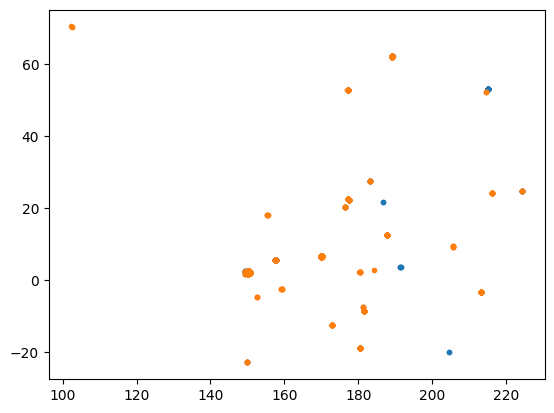

In [9]:
plt.figure()
plt.plot(csc_table['ra'],csc_table['dec'],'.')
plt.plot(xmm_table['ra'],xmm_table['dec'],'.')
plt.show()

xmm_unique_table=tab.unique(xmm_table,keys='srcid')

chan_coords=coord.SkyCoord(ra=csc_table['ra'],dec=csc_table['dec'],unit=(u.deg, u.deg))
xmm_coords=coord.SkyCoord(ra=xmm_unique_table['sc_ra'],dec=xmm_unique_table['sc_dec'],unit=(u.deg, u.deg))

chan_match_idx, d2d, d3d = chan_coords.match_to_catalog_sky(xmm_coords,)

match_radius=3*u.arcsec
dist_mask=d2d<match_radius


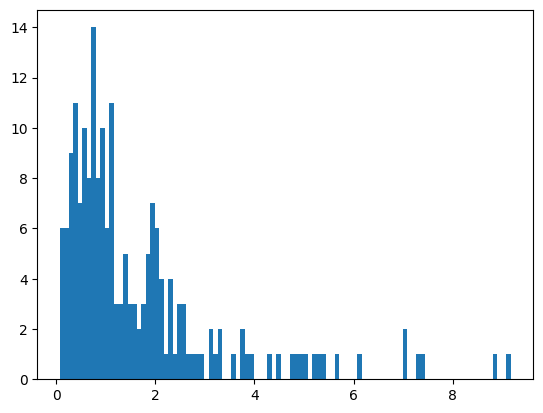

In [12]:
plt.figure()
plt.hist(d2d.arcsec[d2d<10*u.arcsec],bins=100)
plt.show()